In [ ]:
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

from datetime import datetime
from sklearn.utils import check_random_state


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import datasets, svm, metrics, model_selection

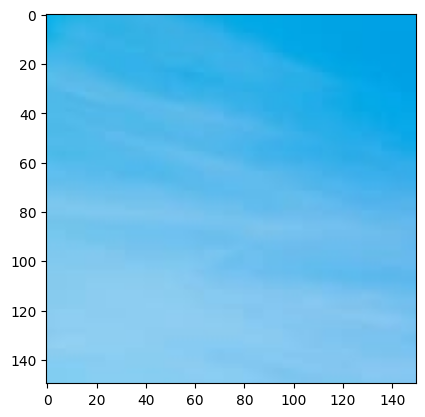

In [3]:
images_path = "resources/cloud-images/cloud-classifier-1"
# identifyign folders/labels
cloud_labels = os.listdir(images_path)
# Removing the .DS_Store file - autogenerated metadata for a folder - native to macOS
if ".DS_Store" in cloud_labels: cloud_labels.remove(".DS_Store")

labeled_data = {}

for label in cloud_labels:
    cloud_images = os.listdir(images_path + "/" + label)
    for image in cloud_images:
        labeled_data[image] =  [{'label': label}]

sample_image = cv2.imread("resources/cloud-images/cloud-classifier-1/clear_sky/A_img1.png")
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
train_images = []
train_labels = []

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    path = images_path + '/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    label = cloud_labels.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    image = cv2.resize(image, (32, 32))
    train_images.append(image)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [18]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

train_images = np.array(train_images)
train_labels = np.array(train_labels)

X, y = train_images,train_labels

Image Processing Duration: 0:01:07.983814


In [19]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [20]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

# Splitting the data
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=None)

Image Processing Duration: 0:01:07.983814


In [21]:
svm_classifier = svm.SVC(gamma='scale')

In [22]:
svm_classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
y_pred_svm = svm_classifier.predict(X_test)

In [24]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.919047619047619


In [27]:
score = svm_classifier.score(X_test, y_test)

print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.9190


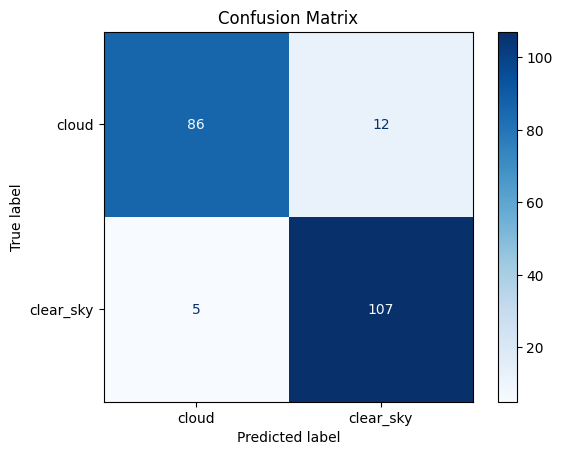

In [31]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cloud_labels)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix")
plt.grid(False)
plt.show()

In [32]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=cloud_labels))

Classification Report:
              precision    recall  f1-score   support

       cloud       0.95      0.88      0.91        98
   clear_sky       0.90      0.96      0.93       112

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



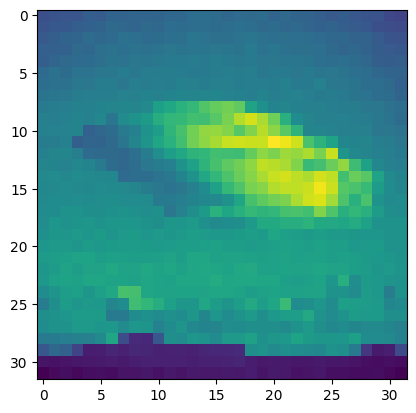

(1024,)
['cloud', 'clear_sky']


array([0])

In [ ]:
#Test

image = cv2.imread("labs/test_image4.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
plt.imshow(image)
plt.show()

image = np.array(image)
image = image.flatten()

print(cloud_labels)
svm_classifier.predict([image])
